In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Path to your CSV file
file_path = 'data_simulation.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Dropping columns that are not useful for the prediction
df.drop(columns=['NOME', 'COGNOME', 'TELEFONO', 'CELLULARE', 'EMAIL', 'COMUNE', 'CAP', 'INDIRIZZO', 'CODICE_FISCALE', 'IBAN', 'COMUNE_NASCITA', 'NOME_AZIENDA', 'TIPO_AZIENDA', 'CODICE_FISCALE_AZIENDA', 'PARTITA_IVA_AZIENDA', 
                 'DOCUMENTAZIONE_PENSIONATO'], inplace=True)


# Define the number of quantiles
num_bins = 5
# Segment the TFR variable into quantiles
df['TFR_Category'] = pd.qcut(df['TFR'], q=num_bins, labels=[
                             'Very Low', 'Low', 'Medium', 'High', 'Very High'])
print(df['TFR'].dtypes)
print(df['TFR_Category'].dtypes)

In [19]:
# Define the number of quantiles
num_bins = 5
# Segment the TFR variable into quantiles
df['TFR_Category'] = pd.qcut(df['TFR'], q=num_bins, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
print(df['TFR'].dtypes)
print(df['TFR_Category'].dtypes)

float64
category


In [20]:
df['TFR_Category'], bins = pd.qcut(df['TFR'], q=num_bins, labels=['Molto Basso', 'Basso', 'Medio', 'Alto', 'Molto Alto'], retbins=True)

for i in range(len(bins)-1):
    #print(f"{bins[i]} to {bins[i+1]} : {df['TFR_Category'].cat.categories[i]}")
    print(f"{df['TFR_Category'].cat.categories[i]} : {bins[i]} to {bins[i+1]}")

Molto Basso : 7254.55 to 44498.392
Basso : 44498.392 to 72049.532
Medio : 72049.532 to 107007.01200000003
Alto : 107007.01200000003 to 160157.70800000004
Molto Alto : 160157.70800000004 to 310022.36


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   IMPORTO_RICHIESTO                 15000 non-null  int64   
 1   TIPO DI OCCUPAZIONE               15000 non-null  object  
 2   PROVINCIA                         15000 non-null  object  
 3   CONSENSO_DATI_PRIVACY             15000 non-null  int64   
 4   CONSENSO_DATI_MRKTG               15000 non-null  int64   
 5   CONSENSO_DATI_CESSIONE_TERZI      15000 non-null  int64   
 6   SESSO                             15000 non-null  object  
 7   REGIONE                           15000 non-null  object  
 8   DATA_NASCITA                      15000 non-null  object  
 9   AGE                               15000 non-null  int64   
 10  anni lavorativi                   15000 non-null  int64   
 11  MOTIVAZIONE_PRESTITO              15000 non-null  obje

In [22]:

# Encode categorical variables
encoders = {}
for column in df.columns:
    if df[column].dtype == 'object' or df[column].dtype.name == 'category':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        encoders[column] = le
print(encoders)


df.drop(columns=['TFR'], inplace=True)

{'TIPO DI OCCUPAZIONE': LabelEncoder(), 'PROVINCIA': LabelEncoder(), 'SESSO': LabelEncoder(), 'REGIONE': LabelEncoder(), 'DATA_NASCITA': LabelEncoder(), 'MOTIVAZIONE_PRESTITO': LabelEncoder(), 'DATA_ ASSUNZIONE_PENSIONAMENTO': LabelEncoder(), 'REGISTRAZIONE_TEL_PRIMO_CONTATTO': LabelEncoder(), 'NOTE_LAVORAZIONE_CONTATTO': LabelEncoder(), 'TFR_Category': LabelEncoder()}


In [23]:

# Define features and target variable
X = df.drop(columns=['MOTIVAZIONE_PRESTITO'])
y = df['MOTIVAZIONE_PRESTITO']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:

# Initialize and train the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_

# Convert the importances into a DataFrame
feature_importances = pd.DataFrame(
    {'feature': X.columns, 'importance': importances})

# Sort the DataFrame by importance
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

# Print the feature importances
print(feature_importances)



                             feature  importance
2                          PROVINCIA    0.575188
7                            REGIONE    0.160541
8                       DATA_NASCITA    0.029736
12    DATA_ ASSUNZIONE_PENSIONAMENTO    0.028162
18         NOTE_LAVORAZIONE_CONTATTO    0.027124
17  REGISTRAZIONE_TEL_PRIMO_CONTATTO    0.027101
1                TIPO DI OCCUPAZIONE    0.023215
0                  IMPORTO_RICHIESTO    0.021788
10                   anni lavorativi    0.020898
9                                AGE    0.020367
19                      TFR_Category    0.011610
11        IMPORTO_STIPENDIO_PENSIONE    0.009046
16     ALTRI_FINANZIAMENTI_ PRESENTI    0.006104
6                              SESSO    0.006100
5       CONSENSO_DATI_CESSIONE_TERZI    0.005729
14            PREVENTIVI_CONCORRENZA    0.005612
15    TRATTENUTE_BUSTA_PAGA_PENSIONE    0.005497
4                CONSENSO_DATI_MRKTG    0.005479
13               TEMPO_INDETERMINATO    0.005437
3             CONSEN

In [27]:

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9963333333333333
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        31
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        34
           3       1.00      0.92      0.96        26
           4       0.92      1.00      0.96        24
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        29
           8       0.96      0.96      0.96        27
           9       1.00      1.00      1.00        40
          10       0.97      1.00      0.99        33
          11       1.00      1.00      1.00        32
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00        27
          14       1.00      1.00      1.00        28
          15       1.00      0.79      0.88        28
          16       1.00      1.00      1.00        2

In [38]:

# Example new customer profile
new_customer = {
    'IMPORTO_RICHIESTO': 8000,
    'TIPO DI OCCUPAZIONE': 'Architetto comunale',
    'PROVINCIA': 'Genova',
    'CONSENSO_DATI_PRIVACY': 1,
    'CONSENSO_DATI_MRKTG': 1,
    'CONSENSO_DATI_CESSIONE_TERZI': 0,
    'SESSO': 'F',
    'REGIONE': 'Liguria',
    'COMUNE': 'City1',
    'CAP': '12345',
    'COMUNE_NASCITA': 'BirthCity1',
    'IMPORTO_STIPENDIO_PENSIONE': 2000,
    'TFR_Category': "Basso",
    'TIPO_AZIENDA': 'Pubblica',
    'TEMPO_INDETERMINATO': 1,
    'PREVENTIVI_CONCORRENZA': 0,
    'TRATTENUTE_BUSTA_PAGA_PENSIONE': 0,
    'ALTRI_FINANZIAMENTI_PRESENTI': 1
}

In [39]:

# Encode the new customer data using the fitted label encoders
print(encoders)

{'TIPO DI OCCUPAZIONE': LabelEncoder(), 'PROVINCIA': LabelEncoder(), 'SESSO': LabelEncoder(), 'REGIONE': LabelEncoder(), 'DATA_NASCITA': LabelEncoder(), 'MOTIVAZIONE_PRESTITO': LabelEncoder(), 'DATA_ ASSUNZIONE_PENSIONAMENTO': LabelEncoder(), 'REGISTRAZIONE_TEL_PRIMO_CONTATTO': LabelEncoder(), 'NOTE_LAVORAZIONE_CONTATTO': LabelEncoder(), 'TFR_Category': LabelEncoder()}


In [40]:
new_customer

{'IMPORTO_RICHIESTO': 8000,
 'TIPO DI OCCUPAZIONE': 'Architetto comunale',
 'PROVINCIA': 'Genova',
 'CONSENSO_DATI_PRIVACY': 1,
 'CONSENSO_DATI_MRKTG': 1,
 'CONSENSO_DATI_CESSIONE_TERZI': 0,
 'SESSO': 'F',
 'REGIONE': 'Liguria',
 'COMUNE': 'City1',
 'CAP': '12345',
 'COMUNE_NASCITA': 'BirthCity1',
 'IMPORTO_STIPENDIO_PENSIONE': 2000,
 'TFR_Category': 'Basso',
 'TIPO_AZIENDA': 'Pubblica',
 'TEMPO_INDETERMINATO': 1,
 'PREVENTIVI_CONCORRENZA': 0,
 'TRATTENUTE_BUSTA_PAGA_PENSIONE': 0,
 'ALTRI_FINANZIAMENTI_PRESENTI': 1}

In [41]:
new_customer_encoded = {}

for column in new_customer:
    if column in encoders:
        new_customer_encoded[column] = encoders[column].transform(
            [new_customer[column]])[0]
    else:
        new_customer_encoded[column] = new_customer[column]

In [48]:

# Convert to DataFrame
new_customer_df = pd.DataFrame([new_customer_encoded])


In [50]:
# Ensure the new customer data has the same columns as the training data
new_customer_df = new_customer_df.reindex(columns=X.columns)

# Now you can make a prediction
predicted_motivation = clf.predict(new_customer_df)

In [52]:
predicted_motivation_label = encoders['MOTIVAZIONE_PRESTITO'].inverse_transform(predicted_motivation)

print(f"Predicted loan motivation for the new customer: {predicted_motivation_label[0]}")



Predicted loan motivation for the new customer: spese viaggi


In [53]:

# Predict the probabilities
predicted_probabilities = clf.predict_proba(new_customer_df)

# Convert the probabilities into a DataFrame
probabilities_df = pd.DataFrame(predicted_probabilities, columns=encoders['MOTIVAZIONE_PRESTITO'].classes_)

print(
    f"Predicted loan motivation for the new customer: {predicted_motivation_label[0]}")
print("Probabilities for each class:")
print(probabilities_df)

Predicted loan motivation for the new customer: spese viaggi
Probabilities for each class:
   Corsi/Specializzazioni  Risarcimenti  acquisto arredamento casa  \
0                     0.0           0.0                        0.0   

   acquisto auto/moto  acquisto immobili  anticipo prima casa  \
0                 0.0                0.0                  0.0   

   consolidamento debiti  investimenti  liquidità  non specificata  \
0                    0.0           0.0        0.0              0.0   

   pagamenti imposte e tasse  rinegoziazione  ristrutturazione casa  \
0                        0.0             0.0                    0.0   

   spese dentistiche  spese matrimoniali  spese medico sanitarie  \
0                0.0                 0.0                     0.0   

   spese per cerimonie  spese universitarie  spese viaggi  
0                  0.0                  0.0           1.0  


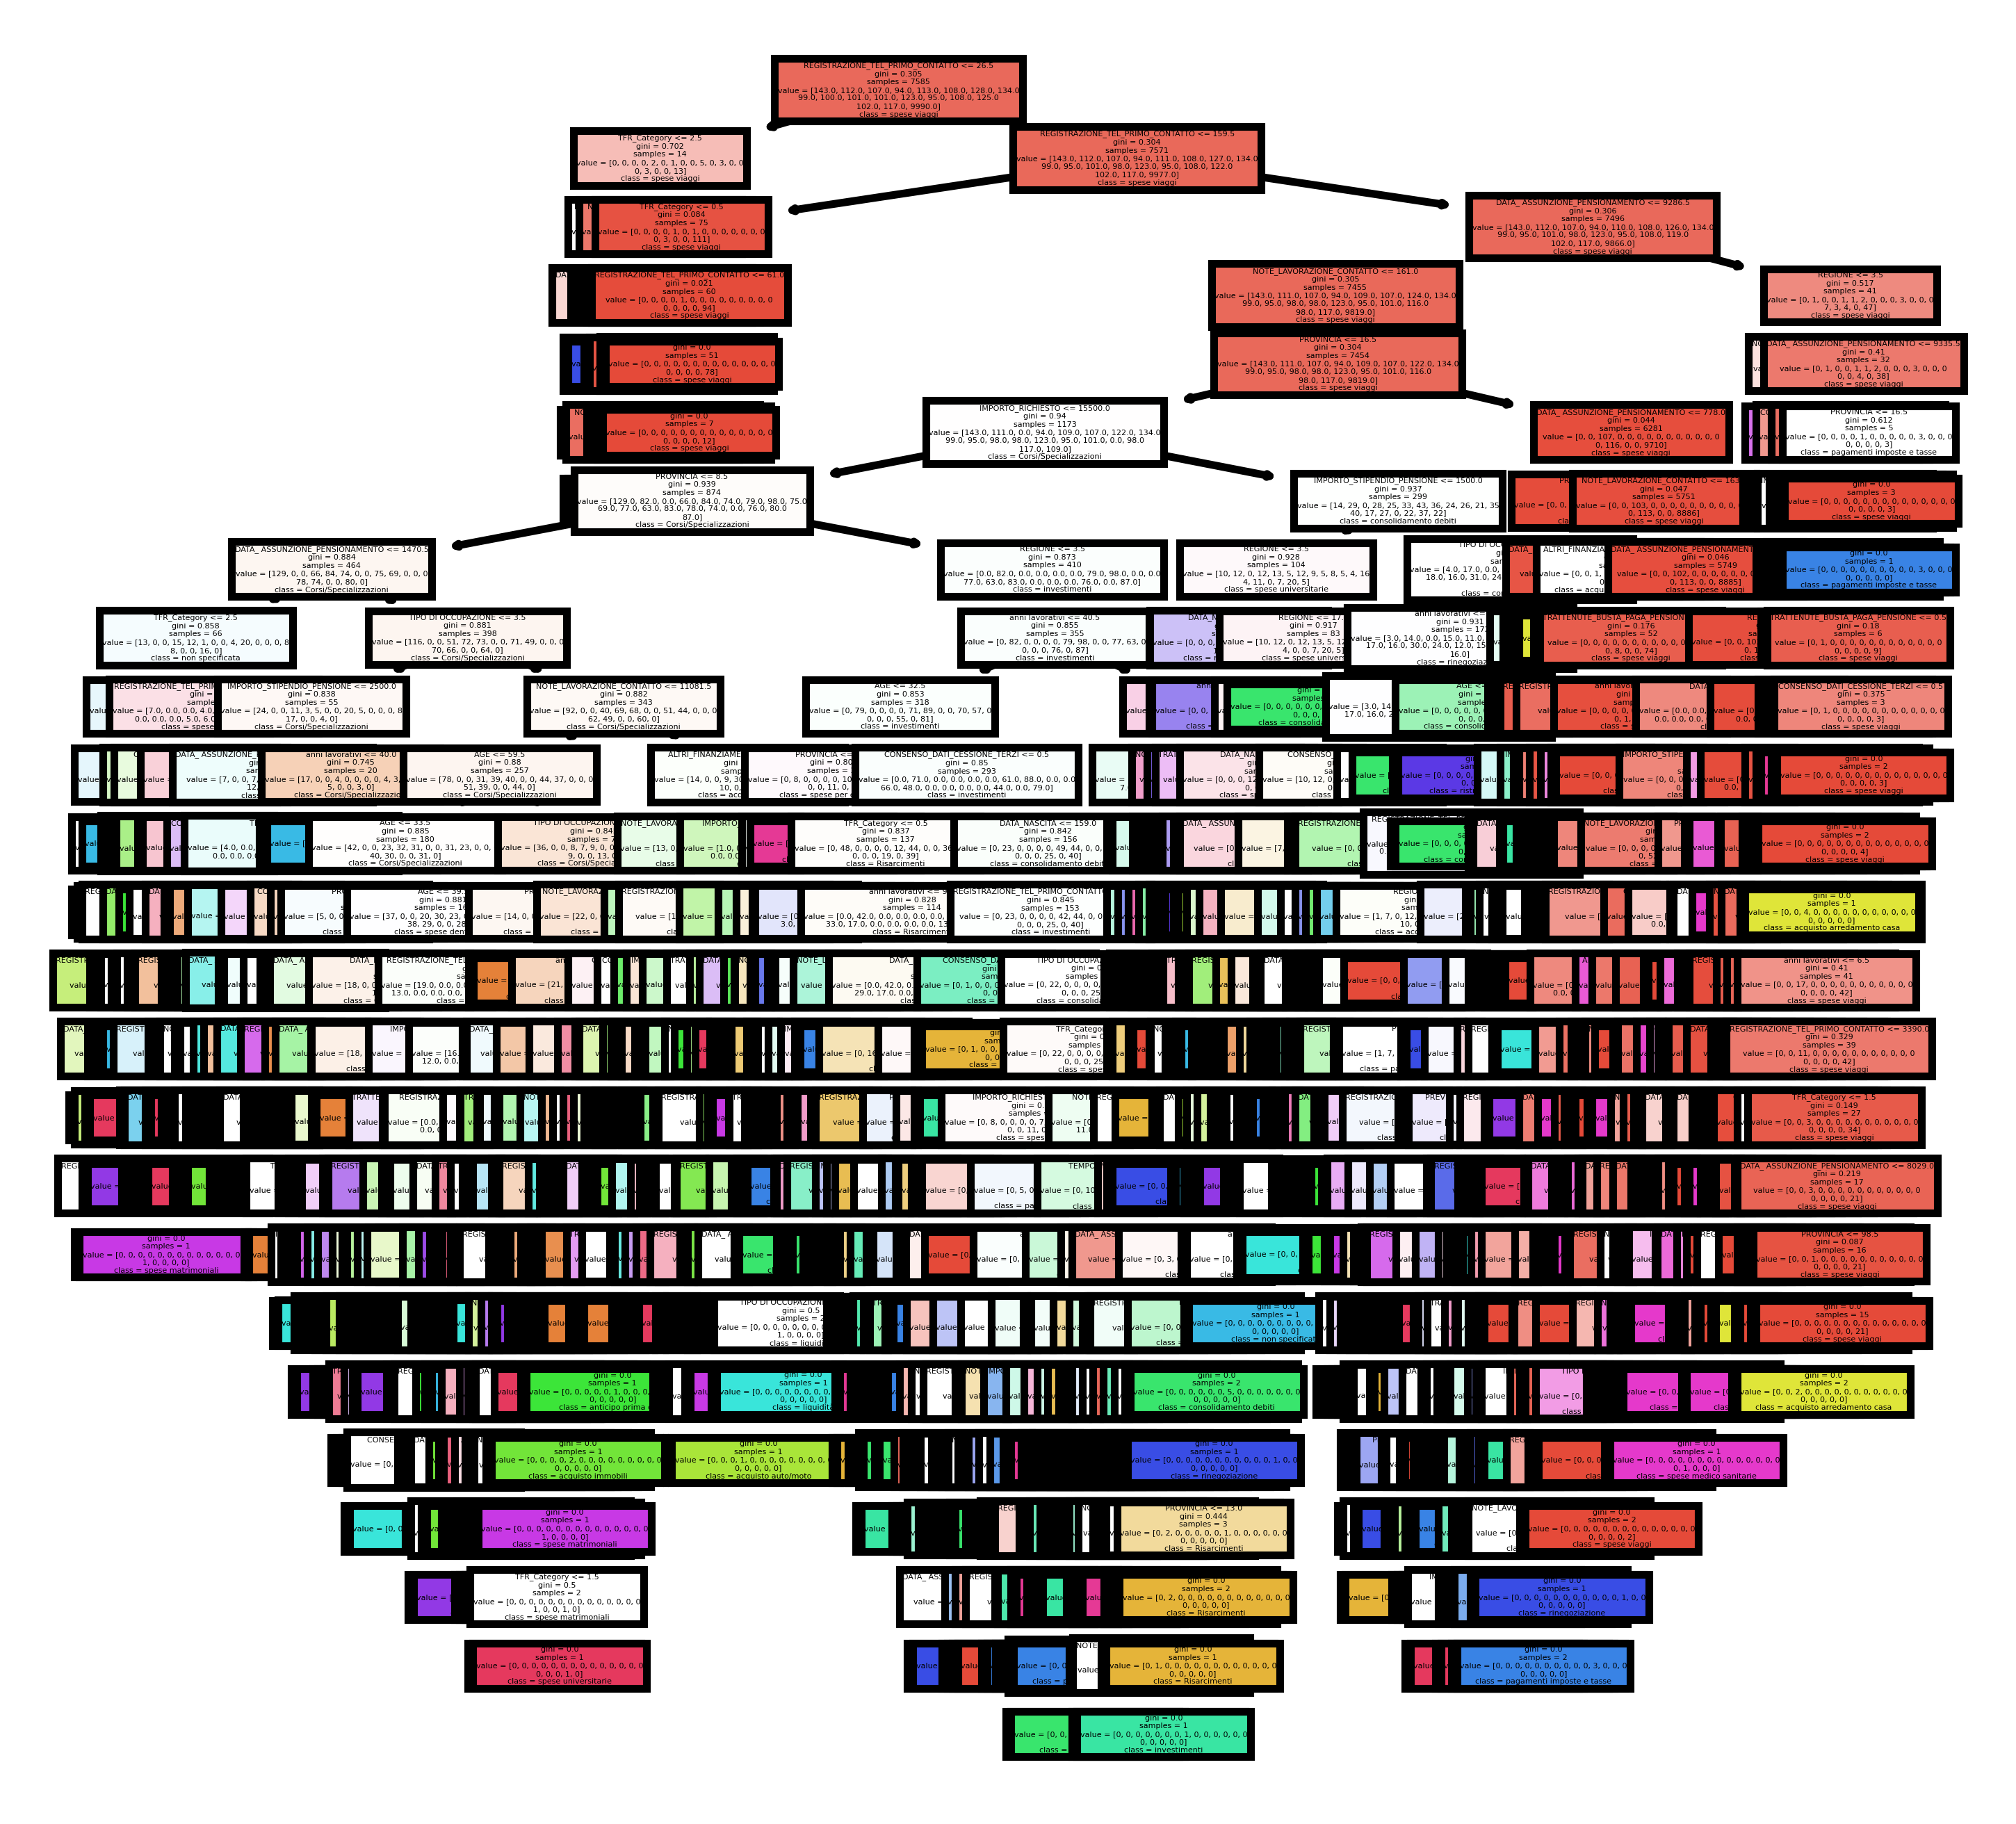

In [55]:
from sklearn import tree
import matplotlib.pyplot as plt

# Select one of the trees in the forest
selected_tree = clf.estimators_[0]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=800)
tree.plot_tree(selected_tree,
               feature_names=X.columns,
               class_names=encoders['MOTIVAZIONE_PRESTITO'].classes_,
               filled=True)
fig.savefig('rf_individualtree.png')

In [56]:
import shap

# Create a TreeExplainer for the RandomForestClassifier
explainer = shap.TreeExplainer(clf)

# Calculate SHAP values for the first 100 instances in the training set
shap_values = explainer.shap_values(X_train[:100])

# Select the SHAP values for the first class
shap_values_class1 = shap_values[0]

# Plot the SHAP values for the first instance
shap.initjs()


In [62]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# One-hot encode the categorical variables
df_encoded = pd.get_dummies(df, columns=['TIPO DI OCCUPAZIONE', 'PROVINCIA','SESSO', 'REGIONE', 'COMUNE', 'CAP', 'COMUNE_NASCITA', 'TIPO_AZIENDA'])

# Standardize the features to have mean=0 and variance=1
features_standardized = StandardScaler().fit_transform(df_encoded)

# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features_standardized)
principalDf = pd.DataFrame(data=principalComponents, columns=[
                           'principal component 1', 'principal component 2'])

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(features_standardized)

# Add the cluster number to the principalDf
principalDf['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x="principal component 1", y="principal component 2", hue="Cluster", data=principalDf, palette=['red', 'blue', 'green'])
plt.show()

KeyError: "None of [Index(['TIPO DI OCCUPAZIONE', 'PROVINCIA', 'SESSO', 'REGIONE', 'COMUNE', 'CAP',\n       'COMUNE_NASCITA', 'TIPO_AZIENDA'],\n      dtype='object')] are in the [columns]"

In [58]:




# Calculate the sum of squared distances for different numbers of clusters
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(features_standardized)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot the sum of squared distances
plt.figure(figsize=(8, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k (number of clusters)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

NameError: name 'features_standardized' is not defined

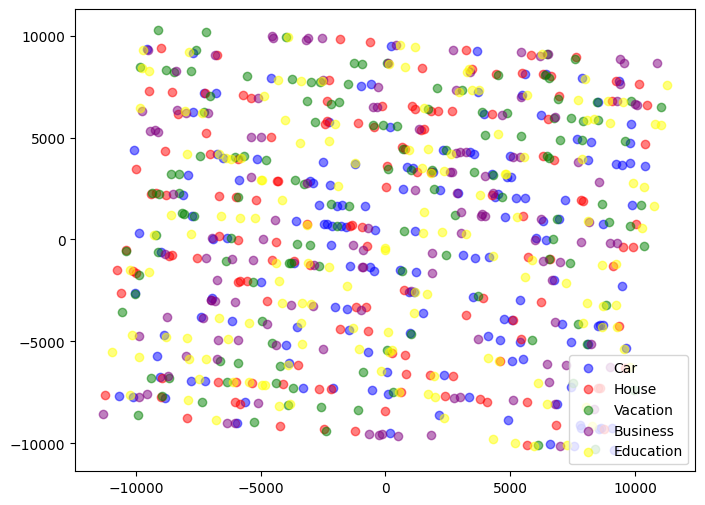

In [59]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Use PCA to reduce dimensionality so we can visualize the dataset on a 2D plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Convert to DataFrame
X_pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Concatenate the DataFrame with target labels
df_pca = pd.concat([X_pca_df, y], axis=1)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca.loc[df_pca['MOTIVAZIONE_PRESTITO'] == 0, 'PC1'],
            df_pca.loc[df_pca['MOTIVAZIONE_PRESTITO'] == 0, 'PC2'], color='blue', alpha=0.5, label='Car')
plt.scatter(df_pca.loc[df_pca['MOTIVAZIONE_PRESTITO'] == 1, 'PC1'],
            df_pca.loc[df_pca['MOTIVAZIONE_PRESTITO'] == 1, 'PC2'], color='red', alpha=0.5, label='House')
plt.scatter(df_pca.loc[df_pca['MOTIVAZIONE_PRESTITO'] == 2, 'PC1'],
            df_pca.loc[df_pca['MOTIVAZIONE_PRESTITO'] == 2, 'PC2'], color='green', alpha=0.5, label='Vacation')
plt.scatter(df_pca.loc[df_pca['MOTIVAZIONE_PRESTITO'] == 3, 'PC1'],
            df_pca.loc[df_pca['MOTIVAZIONE_PRESTITO'] == 3, 'PC2'], color='purple', alpha=0.5, label='Business')
plt.scatter(df_pca.loc[df_pca['MOTIVAZIONE_PRESTITO'] == 4, 'PC1'],
            df_pca.loc[df_pca['MOTIVAZIONE_PRESTITO'] == 4, 'PC2'], color='yellow', alpha=0.5, label='Education')
plt.legend()
plt.show()

In [60]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(features_standardized)

# Convert the original data dictionary to a DataFrame
df_original = pd.DataFrame(data)

# Add the cluster assignments to the original DataFrame
df_original['Cluster'] = clusters

# Print the DataFrame with the cluster assignments
print(df_original)

NameError: name 'features_standardized' is not defined

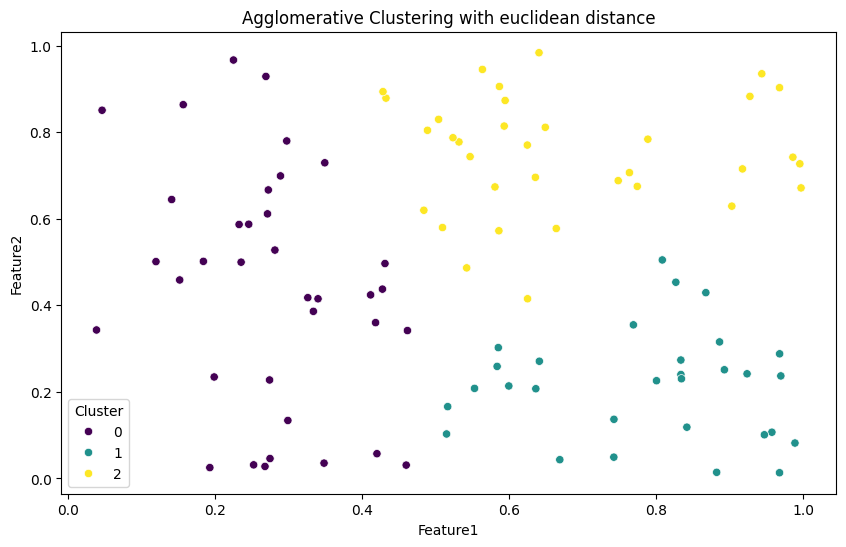

In [61]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100)
}
df = pd.DataFrame(data)

# Choose distance metric
metric = 'euclidean'  # Change this to 'manhattan', 'minkowski', etc. euclidean

# Perform Agglomerative Clustering
clustering = AgglomerativeClustering(
    n_clusters=3, metric=metric, linkage='ward')
labels = clustering.fit_predict(df)

# Add cluster labels to DataFrame
df['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Feature1', y='Feature2',
                hue='Cluster', palette='viridis')
plt.title('Agglomerative Clustering with {} distance'.format(metric))
plt.show()

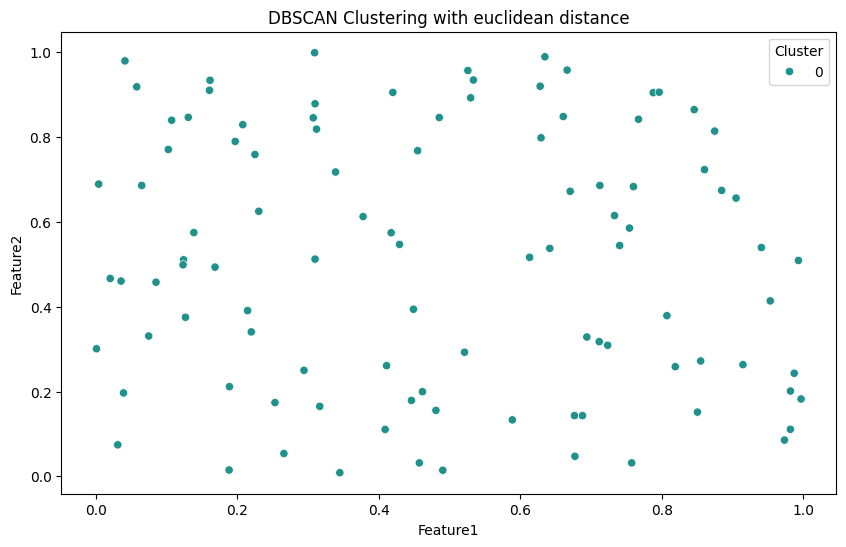

In [57]:
from sklearn.cluster import DBSCAN

# Choose distance metric
metric = 'euclidean'  # Change this to 'euclidean', 'minkowski', etc. manhattan

# Perform DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5, metric=metric)
labels = dbscan.fit_predict(df)

# Add cluster labels to DataFrame
df['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Feature1', y='Feature2',
                hue='Cluster', palette='viridis')
plt.title('DBSCAN Clustering with {} distance'.format(metric))
plt.show()